In [5]:
import lettuce as lt
from matplotlib import pyplot as plt
import numpy as np

In [6]:
def run(ny=100, *axes):
    lattice = lt.Lattice(lt.D2Q9, "cuda:0")
    flow = lt.Obstacle2D(
        resolution_x=2*ny,
        resolution_y=ny,
        reynolds_number=50.0,
        mach_number=0.05,
        lattice=lattice,
        char_length_lu=10.1,
    )
    x, y = flow.grid
    flow.mask = np.sqrt((x-5)**2+(y-5)**2) < 1.0001
    axes[0].imshow(flow.mask.T, origin="lower")

    tau = flow.units.relaxation_parameter_lu
    sim = lt.Simulation(flow, lattice, lt.BGKCollision(lattice, tau),
                        lt.StandardStreaming(lattice))
    sim.step(ny * 100)
    u = flow.units.convert_velocity_to_pu(lattice.u(sim.f).detach().cpu().numpy())
    return axes[1].imshow(u[0, ...].T, origin="lower")
    print("Max Velocity:", u.max())

In [7]:
def run_and_plot(n):
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    fig.subplots_adjust(right=0.85)
    im2 = run(n, *axes)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im2, cax=cbar_ax)

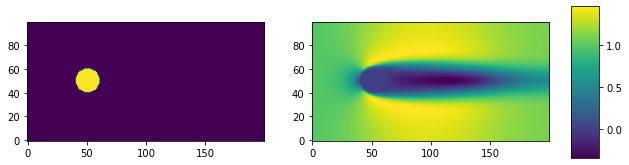

In [8]:
run_and_plot(100)